In [1]:
import pandas as pd
import matplotlib as plt
import mplsoccer as mls

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
df_lineups = pd.read_excel('../lineups.xlsx', sheet_name='Hoja1')
df_lineups.head()

,id,jersey_number,player_name,team,country,time_card,card_type,reason,period,position_id,position,from,to,from_period,to_period,start_reason,end_reason
0,0,1,Ignacio Salas,C.D. Retiro Sur,Spain,NaN,NaN,NaN,NaN,1,POR,00:00,NaN,1.0,NaN,XI,Final
1,1,3,Manuel Pascual,C.D. Retiro Sur,Spain,NaN,NaN,NaN,NaN,2,LD,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,Adrian Lopez,C.D. Retiro Sur,Spain,89:00,Yellow,Falta cometida,2.0,3,CB,00:00,NaN,1.0,NaN,XI,Final
3,3,6,Francisco José,C.D. Retiro Sur,Spain,NaN,NaN,NaN,NaN,4,LI,00:00,NaN,1.0,NaN,XI,Final
4,4,7,Juan Camilo,C.D. Retiro Sur,Spain,67:00,Yellow,Falta cometida,2.0,5,DC,00:00,84:00,1.0,2.0,XI,Táctico


In [3]:
df_events = pd.read_excel('../eventos.xlsx', sheet_name='Hoja1')
df_events.head()

,timestamp,team,type,minute,x_location,y_location,x_pass_end_location,y_pass_end_location,pass_recipient,pass_outcome,pass_height,player,possession_team,shot_aerial_won,shot_body_part,x_shot_end_location,y_shot_end_location,z_shot_end_location,shot_outcome,shot_type
0,00:00:00.000,C.D. Retiro Sur,Starting XI,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C.D. Retiro Sur,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00:00:00.000,Escuela Dep. Moratalaz 'D',Starting XI,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C.D. Retiro Sur,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00:00:00.000,Escuela Dep. Moratalaz 'D',Half Start,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C.D. Retiro Sur,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00:00:00.000,C.D. Retiro Sur,Half Start,0,60.0,40.0,34.0,34.0,Adrian Lopez,Complete,Ground Pass,Ali Nabahim,C.D. Retiro Sur,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00:00:00.253,C.D. Retiro Sur,Ball Receipt,0,38.0,32.0,NaN,NaN,NaN,NaN,NaN,Adrian Lopez,C.D. Retiro Sur,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_events['team'].value_counts()

Escuela Dep. Moratalaz 'D'    93
C.D. Retiro Sur               78
Name: team, dtype: int64

In [5]:
df_events.type.value_counts()

Pass              77
Ball Receipt      51
Clearance          8
Throw-in           4
Foul Committed     4
Goal Keeper        4
Miscontrol         3
Duel               3
Ball Recovery      3
Interception       3
Dribble            3
Starting XI        2
Half Start         2
Shot               2
Misdribble         2
Name: type, dtype: int64

In [6]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            171 non-null    object 
 1   team                 171 non-null    object 
 2   type                 171 non-null    object 
 3   minute               171 non-null    int64  
 4   x_location           166 non-null    float64
 5   y_location           166 non-null    float64
 6   x_pass_end_location  86 non-null     float64
 7   y_pass_end_location  86 non-null     float64
 8   pass_recipient       62 non-null     object 
 9   pass_outcome         78 non-null     object 
 10  pass_height          78 non-null     object 
 11  player               164 non-null    object 
 12  possession_team      171 non-null    object 
 13  shot_aerial_won      0 non-null      float64
 14  shot_body_part       2 non-null      object 
 15  x_shot_end_location  2 non-null      flo

In [7]:
df_events[(df_events.team == 'C.D. Retiro Sur') & (df_events.type == 'Pass')]

,timestamp,team,type,minute,x_location,y_location,x_pass_end_location,y_pass_end_location,pass_recipient,pass_outcome,pass_height,player,possession_team,shot_aerial_won,shot_body_part,x_shot_end_location,y_shot_end_location,z_shot_end_location,shot_outcome,shot_type
5,00:00:03.332,C.D. Retiro Sur,Pass,0,38.0,32.0,89.0,60.0,Ali Nabahim,Complete,High Pass,Adrian Lopez,C.D. Retiro Sur,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,00:00:07.082,C.D. Retiro Sur,Pass,0,89.0,60.0,84.0,56.0,Raúl Angullo,Complete,Low Pass,Ali Nabahim,C.D. Retiro Sur,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,00:00:08.242,C.D. Retiro Sur,Pass,0,84.0,56.0,94.0,40.0,Juan Camilo,Complete,High Pass,Raúl Angullo,C.D. Retiro Sur,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,00:01:25.890,C.D. Retiro Sur,Pass,1,54.0,59.0,50.0,66.0,Ramón Salas,Complete,Ground Pass,Guillermo Escalera,C.D. Retiro Sur,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,00:01:27.120,C.D. Retiro Sur,Pass,1,50.0,66.0,54.0,35.0,Adrian Lopez,Complete,Ground Pass,Ramón Salas,C.D. Retiro Sur,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,00:01:32.580,C.D. Retiro Sur,Pass,1,56.0,32.0,84.0,62.0,Daniel Serrano,Complete,High Pass,Adrian Lopez,C.D. Retiro Sur,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,00:01:34.330,C.D. Retiro Sur,Pass,1,84.0,62.0,95.0,48.0,Ali Nabahim,Complete,High Pass,Daniel Serrano,C.D. Retiro Sur,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,00:01:36.690,C.D. Retiro Sur,Pass,1,95.0,45.0,91.0,42.0,Raúl Angullo,Complete,Low Pass,Ali Nabahim,C.D. Retiro Sur,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,00:01:39.020,C.D. Retiro Sur,Pass,1,91.0,42.0,89.0,38.0,Oscar López,Complete,Ground Pass,Raúl Angullo,C.D. Retiro Sur,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,00:01:39.620,C.D. Retiro Sur,Pass,1,89.0,38.0,102.0,18.0,NaN,Incomplete,Low Pass,Oscar López,C.D. Retiro Sur,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_events[(df_events.type == 'Shot')& (df_events.shot_outcome == 'Goal')]

,timestamp,team,type,minute,x_location,y_location,x_pass_end_location,y_pass_end_location,pass_recipient,pass_outcome,pass_height,player,possession_team,shot_aerial_won,shot_body_part,x_shot_end_location,y_shot_end_location,z_shot_end_location,shot_outcome,shot_type
66,00:03:12.340,C.D. Retiro Sur,Shot,3,102.0,40.0,NaN,NaN,NaN,NaN,NaN,Raúl Angullo,C.D. Retiro Sur,NaN,Left Foot,120.0,37.0,3.0,Goal,Open Play


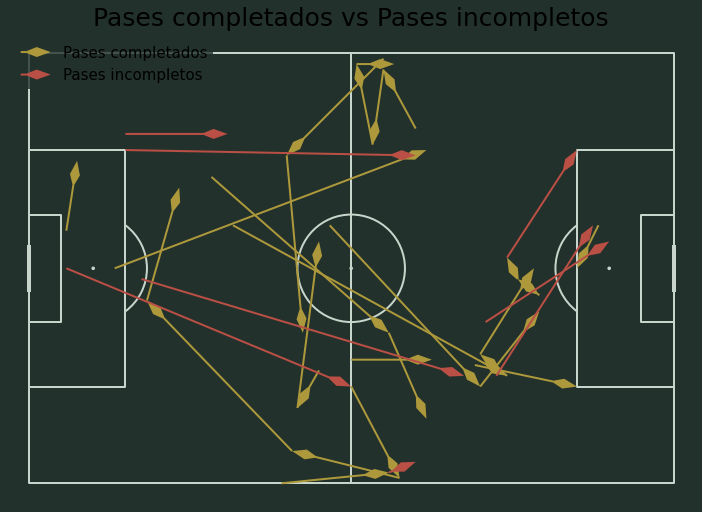

In [9]:
pitch = mls.Pitch(pitch_type='statsbomb',pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(14, 7), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

## Pases Completatos del Retiro
pitch.arrows(df_events[(df_events.team == 'C.D. Retiro Sur') & (df_events.type == 'Pass') & (df_events.pass_outcome == 'Complete')].x_location, df_events[(df_events.team == 'C.D. Retiro Sur') & (df_events.type == 'Pass')& (df_events.pass_outcome == 'Complete')].y_location,
             df_events[(df_events.team == 'C.D. Retiro Sur') & (df_events.type == 'Pass')& (df_events.pass_outcome == 'Complete')].x_pass_end_location, df_events[(df_events.team == 'C.D. Retiro Sur') & (df_events.type == 'Pass')& (df_events.pass_outcome == 'Complete')].y_pass_end_location, width=2,
             headwidth=5, headlength=7, headaxislength=12, color='#ad993c', ax=ax, label='Pases completados')

## Pases Fallados del Retiro
pitch.arrows(df_events[(df_events.team == 'C.D. Retiro Sur') & (df_events.type == 'Pass') & (df_events.pass_outcome == 'Incomplete')].x_location, df_events[(df_events.team == 'C.D. Retiro Sur') & (df_events.type == 'Pass')& (df_events.pass_outcome == 'Incomplete')].y_location,
             df_events[(df_events.team == 'C.D. Retiro Sur') & (df_events.type == 'Pass')& (df_events.pass_outcome == 'Incomplete')].x_pass_end_location, df_events[(df_events.team == 'C.D. Retiro Sur') & (df_events.type == 'Pass')& (df_events.pass_outcome == 'Incomplete')].y_pass_end_location, width=2,
             headwidth=5, headlength=7, headaxislength=12,
             color='#ba4f45', ax=ax, label='Pases incompletos')
## Leyenda
ax.legend(facecolor='#22312b', handlelength=2, edgecolor='None', fontsize=15, loc='upper left')

## Titulo
ax_title = ax.set_title('Pases completados vs Pases incompletos', fontsize=25)

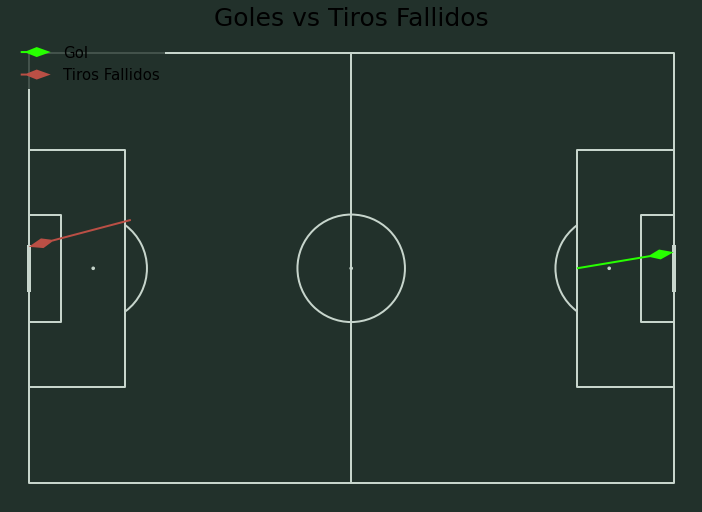

In [10]:
pitch = mls.Pitch(pitch_type='statsbomb',pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(14, 7), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

## Pases Completatos del Retiro
pitch.arrows(df_events[(df_events.type == 'Shot')& (df_events.shot_outcome == 'Goal')].x_location, df_events[(df_events.type == 'Shot')& (df_events.shot_outcome == 'Goal')].y_location,
             df_events[(df_events.type == 'Shot')& (df_events.shot_outcome == 'Goal')].x_shot_end_location, df_events[(df_events.type == 'Shot')& (df_events.shot_outcome == 'Goal')].y_shot_end_location, width=2,
             headwidth=5, headlength=7, headaxislength=12, color='#27FF00', ax=ax, label='Gol')

## Pases Fallados del Retiro
pitch.arrows(df_events[(df_events.type == 'Shot')& (df_events.shot_outcome != 'Goal')].x_location, df_events[(df_events.type == 'Shot')& (df_events.shot_outcome != 'Goal')].y_location,
             df_events[(df_events.type == 'Shot')& (df_events.shot_outcome != 'Goal')].x_shot_end_location, df_events[(df_events.type == 'Shot')& (df_events.shot_outcome != 'Goal')].y_shot_end_location, width=2,
             headwidth=5, headlength=7, headaxislength=12,
             color='#ba4f45', ax=ax, label='Tiros Fallidos')
## Leyenda
ax.legend(facecolor='#22312b', handlelength=2, edgecolor='None', fontsize=15, loc='upper left')

## Titulo
ax_title = ax.set_title('Goles vs Tiros Fallidos', fontsize=25)

In [11]:
flamingo_cmap = plt.colors.LinearSegmentedColormap.from_list("Flamingo - 100 colors",
                                                  ['#e3aca7', '#c03a1d'], N=100)

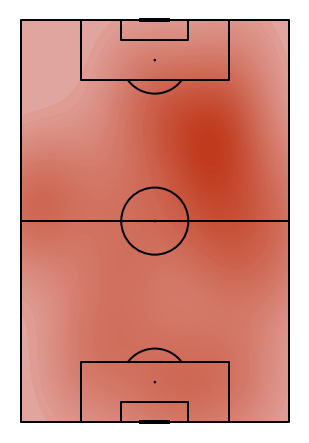

In [12]:
# Mapa de calor del equipo
pitch = mls.VerticalPitch(line_color='#000009', line_zorder=2)
fig, ax = pitch.draw(figsize=(4.4, 6.4))

kde = pitch.kdeplot(df_events[df_events.team == 'C.D. Retiro Sur'].x_location, df_events[df_events.team == 'C.D. Retiro Sur'].y_location, ax=ax,
                    # shade using 100 levels so it looks smooth
                    shade=True, levels=100,
                    # shade the lowest area so it looks smooth
                    # so even if there are no events it gets some color
                    shade_lowest=True,
                    cut=4,  # extended the cut so it reaches the bottom edge
                    cmap=flamingo_cmap)

In [16]:
df_events[(df_events.type == 'Foul Committed') & (df_events.team == 'C.D. Retiro Sur')].x_location

,timestamp,team,type,minute,x_location,y_location,x_pass_end_location,y_pass_end_location,pass_recipient,pass_outcome,pass_height,player,possession_team,shot_aerial_won,shot_body_part,x_shot_end_location,y_shot_end_location,z_shot_end_location,shot_outcome,shot_type
93,00:05:20.800,C.D. Retiro Sur,Foul Committed,5,108.0,65.0,NaN,NaN,NaN,NaN,NaN,Raúl Angullo,Escuela Dep. Moratalaz 'D',NaN,NaN,NaN,NaN,NaN,NaN,NaN


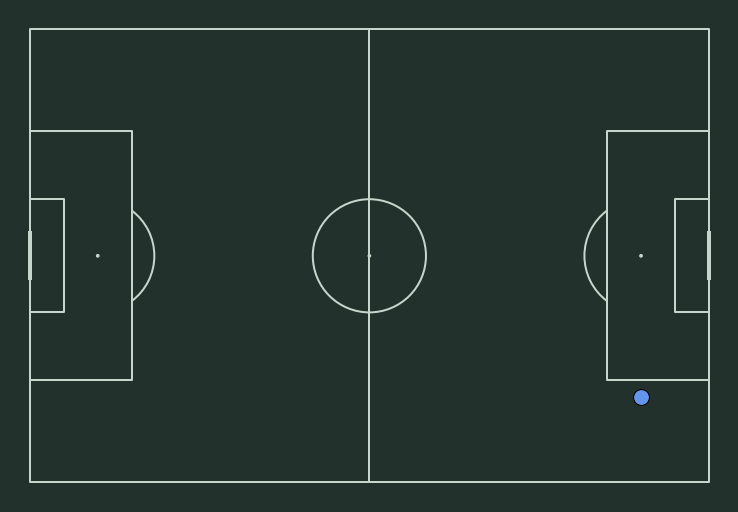

In [22]:
pitch = mls.Pitch(pitch_type='statsbomb',pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(14, 7), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

scatter = pitch.scatter(df_events[(df_events.type == 'Foul Committed') & (df_events.team == 'C.D. Retiro Sur')].x_location, df_events[(df_events.type == 'Foul Committed') & (df_events.team == 'C.D. Retiro Sur')].y_location, 
                        ax=ax, edgecolor='black', facecolor='cornflowerblue',s=250)